In [2]:
import pandas as pd
import seaborn as sns
from __future__ import division
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import sklearn.preprocessing as skpp
from pandas.tools.plotting import scatter_matrix

%matplotlib inline
sns.set_style('whitegrid')


In [3]:
# reading csv file that was an export from hue
df = pd.read_csv('/Users/Taha/Downloads/cluster-districts.csv')

In [9]:
df.head()

,date,month,id,name,state,county,7d,28d,schools,max_7d,registered,nces_teachers
0,2014-07-01,7,11915,Anthony Wayne Local,OH,Lucas,2,15,6,19,72,207
1,2014-07-01,7,105,Marshall County,AL,Marshall,0,7,16,15,125,444
3,2014-07-01,7,17595,Manitowoc School District,WI,Manitowoc,1,4,13,11,60,350
5,2014-07-01,7,5509,Lincoln County,KY,Lincoln,2,6,11,12,90,270
6,2014-07-01,7,8699,Billings Elem,MT,Yellowstone,1,3,26,43,135,649


In [11]:
print df['date'].min(), df['date'].max()

2014-07-01 2016-05-07


In [21]:
# looking at start of school year in 2014 to end of school year in 2016 i-e 3 school years 
df = df[ df['date'] > '2014-07-31' ]

In [22]:
print df['date'].min(), df['date'].max()

2014-08-01 2016-05-07


In [28]:
print df['nces_teachers'][ df['id'] == 11915 ].max(), df['nces_teachers'][ df['id'] == 2885 ].max()

207 11450


In [29]:
# group by district id
# get mean of 7d actives from 7/1/14 to 5/7/16 
# get max of max_7d -- max_7d column is absolute max of 7d actives for the account anyway
# get max of nces_teachers for physical teacher population at the district

df_7d = df.groupby(['id'], as_index=False).agg({'7d':'mean', 'max_7d':'max', 'nces_teachers':'max'})

In [30]:
print df_7d['nces_teachers'][ df_7d['id'] == 11915 ].max(), df_7d['nces_teachers'][ df_7d['id'] == 2885 ].max()

207 11450


In [34]:
df_7d['pen_mean_7d'] = df_7d['7d'] / df_7d['nces_teachers']
df_7d['pen_max_7d'] = df_7d['max_7d'] / df_7d['nces_teachers']

In [35]:
df_7d.head()

,id,7d,nces_teachers,max_7d,pen_mean_7d,pen_max_7d
0,6,10.320197,273,99,0.037803,0.362637
1,9,13.192118,138,45,0.095595,0.326087
2,11,4.344828,209,32,0.020789,0.153110
3,13,3.955665,478,15,0.008275,0.031381
4,14,11.351396,606,95,0.018732,0.156766


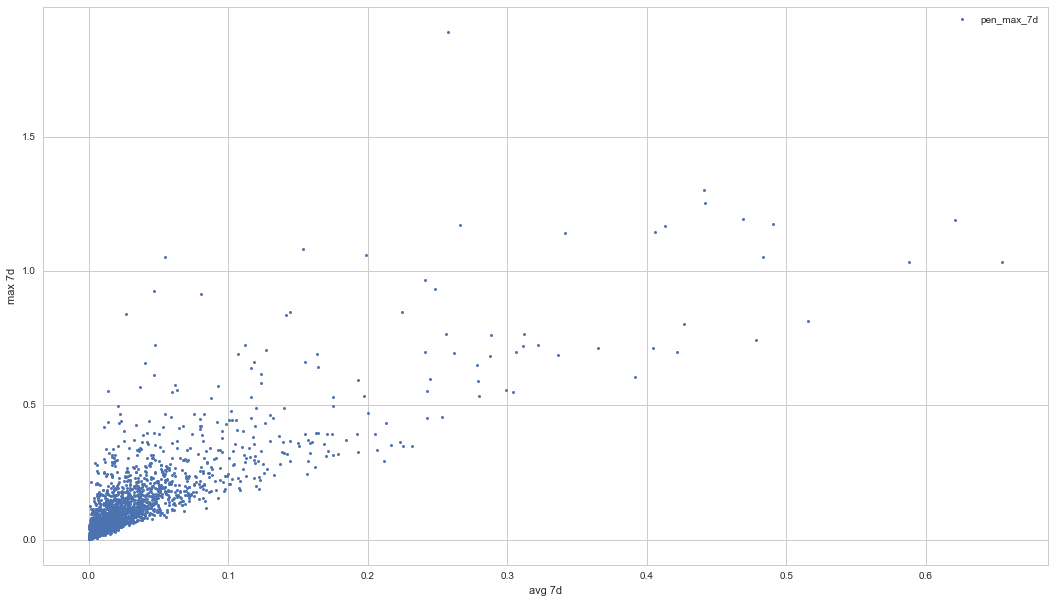

In [37]:
fig, ax = plt.subplots()

ax.margins(0.05)

ax.plot(df_7d.pen_mean_7d, df_7d.pen_max_7d, marker='o', linestyle='', ms=3)

ax.set_xlabel("avg 7d")
ax.set_ylabel("max 7d")

fig.set_size_inches(18, 10)
plt.show()

In [46]:
# few accounts have percentages points that are higher than 1(probably because of incorrect NCES teacher count)
df_7d[ df_7d['pen_max_7d'] >= 0.95 ].sort_values(by='pen_max_7d', ascending=False)

,id,7d,nces_teachers,max_7d,pen_mean_7d,pen_max_7d
140,822,2.319185,9,17,0.257687,1.888889
483,2172,68.827586,156,203,0.441202,1.301282
1323,6903,98.983580,224,281,0.441891,1.254464
1450,8046,242.513957,517,617,0.469079,1.193424
2223,14699,121.727422,196,233,0.621058,1.188776
2219,14693,897.781609,1831,2148,0.490323,1.173129
2441,15625,515.899836,1941,2270,0.265791,1.169500
2461,15704,157.901478,382,446,0.413355,1.167539
1477,8268,110.794745,273,313,0.405842,1.146520
1054,5494,85.944171,252,288,0.341048,1.142857


In [53]:
# capping out at 0.96. Accounts with higher than 1 percentage point are already in high usage cluster
 
def cap_out_max(max_7d):
    if max_7d > 0.96:
        return 0.96
    else:
        return max_7d
    
df_7d['pen_max_7d_adjusted'] = df_7d[ 'pen_max_7d' ].apply(cap_out_max)

In [54]:
df_7d[ df_7d['pen_max_7d'] >= 0.95 ].sort_values(by='pen_max_7d', ascending=False)

,id,7d,nces_teachers,max_7d,pen_mean_7d,pen_max_7d,pen_max_7d_adjusted
140,822,2.319185,9,17,0.257687,1.888889,0.96
483,2172,68.827586,156,203,0.441202,1.301282,0.96
1323,6903,98.983580,224,281,0.441891,1.254464,0.96
1450,8046,242.513957,517,617,0.469079,1.193424,0.96
2223,14699,121.727422,196,233,0.621058,1.188776,0.96
2219,14693,897.781609,1831,2148,0.490323,1.173129,0.96
2441,15625,515.899836,1941,2270,0.265791,1.169500,0.96
2461,15704,157.901478,382,446,0.413355,1.167539,0.96
1477,8268,110.794745,273,313,0.405842,1.146520,0.96
1054,5494,85.944171,252,288,0.341048,1.142857,0.96


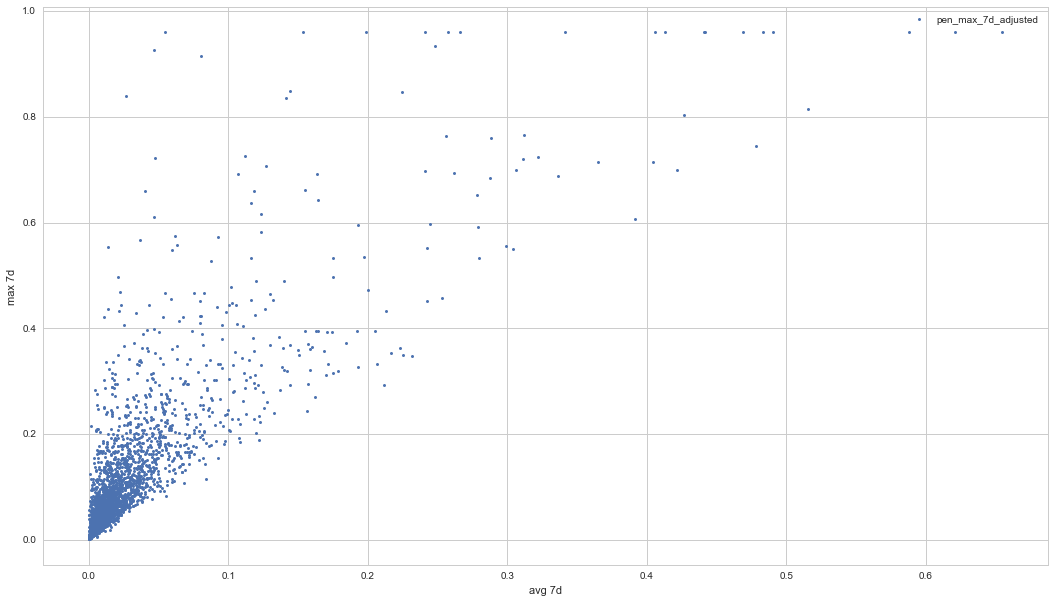

In [56]:
# plotting adjusted max 7d penetration

fig, ax = plt.subplots()

ax.margins(0.05)

ax.plot(df_7d.pen_mean_7d, df_7d.pen_max_7d_adjusted, marker='o', linestyle='', ms=3)

ax.set_xlabel("avg 7d")
ax.set_ylabel("max 7d")

fig.set_size_inches(18, 10)
plt.show()

In [58]:
# preparing data to run k means clustering

cluster_df = df_7d[['pen_mean_7d','pen_max_7d_adjusted']]
cluster_df = cluster_df.dropna()

In [59]:
cluster_df.max()

pen_mean_7d            0.654555
pen_max_7d_adjusted    0.960000
dtype: float64

In [60]:
# scaling
dfscale = pd.DataFrame(skpp.scale(cluster_df)).rename(columns={0:'pen_mean_7d', 1:'pen_max_7d'})
dfscale.head()

,pen_mean_7d,pen_max_7d
0,0.178837,1.806816
1,1.285421,1.542242
2,-0.146947,0.290132
3,-0.386545,-0.591017
4,-0.186333,0.316594


In [61]:
#kmeans

km = KMeans(init='k-means++', n_clusters=3)
km.fit(dfscale)

clusters = km.predict(dfscale)

dfscale['cluster'] = clusters
dfscale.head()


,pen_mean_7d,pen_max_7d,cluster
0,0.178837,1.806816,0
1,1.285421,1.542242,0
2,-0.146947,0.290132,2
3,-0.386545,-0.591017,2
4,-0.186333,0.316594,2


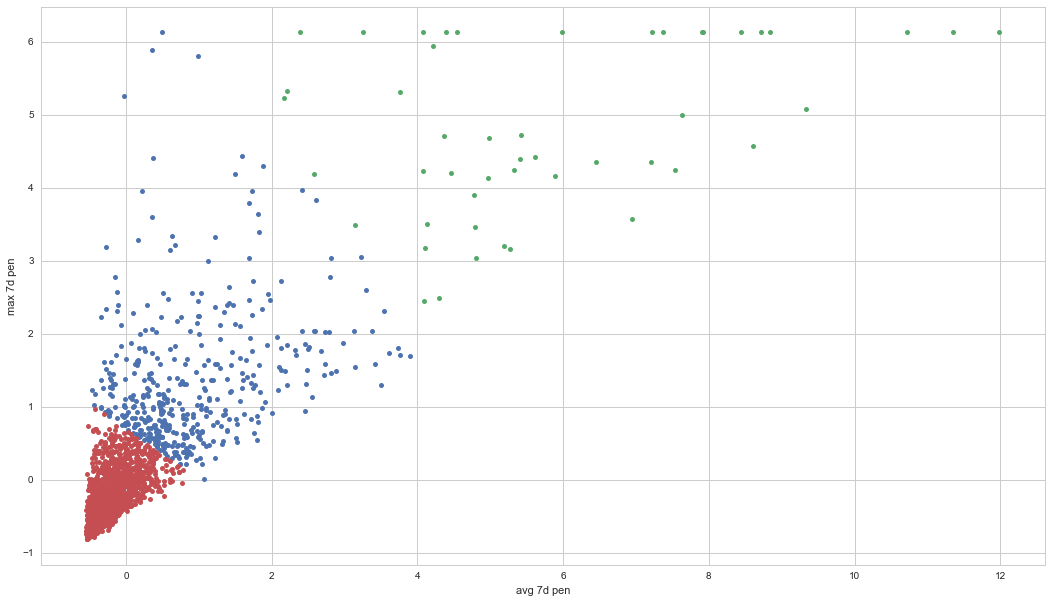

In [71]:
#group by clusters and plot

groups = dfscale.groupby('cluster')

fig, ax = plt.subplots()
ax.margins(0.05)
for name, group in groups:
    ax.plot(group.pen_mean_7d, group.pen_max_7d, marker='o', linestyle='', ms=5, label=name)

ax.set_xlabel("avg 7d pen")
ax.set_ylabel("max 7d pen")

fig.set_size_inches(18, 10)
plt.show()

In [69]:
dfscale.groupby('cluster').describe()

pen_max_7d  pen_mean_7d
cluster                                
0       count   435.000000   435.000000
        mean      1.326638     0.876123
        std       0.908568     0.852652
        min       0.023240    -0.464290
        25%       0.707164     0.300870
        50%       1.084936     0.665134
        75%       1.667536     1.292609
        max       6.130883     3.892265
1       count    48.000000    48.000000
        mean      4.814293     5.809030
        std       1.157497     2.351892
        min       2.456434     2.164667
        25%       4.150699     4.192254
        50%       4.701617     5.226350
        75%       6.130883     7.410218
        max       6.130883    11.988196
2       count  2354.000000  2354.000000
        mean     -0.343319    -0.280351
        std       0.332539     0.228475
        min      -0.810421    -0.545001
        25%      -0.602092    -0.451402
        50%      -0.427423    -0.346245
        75%      -0.144821    -0.177369
        max       0.974877     0.775779